## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [8]:
penguins = sns.load_dataset("penguins")
penguins.dropna(axis=0, inplace= True)

In [9]:
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [17]:
features= ['flipper_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=3)

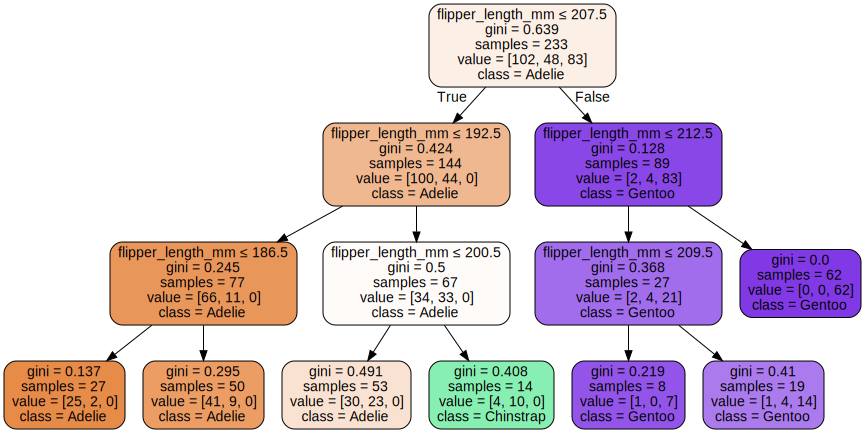

In [18]:
plot_tree_classification(dt_classification, features, penguins.species.unique())